In [1]:
%pip install -U pip icecream lightautoml

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
from icecream import ic

import matplotlib.pyplot as plt

# Загрузка

### pricing_hackathon_checks_train.csv – чековые данные для обучения
Период – 01.01.2018 – 30.06.2021

`['client_id', 'day', 'shop_id', 'check_id', 'time', 'sku', 'promo_id', 'check_pos', 'num_sales', 'supplier_price', 'selling_price', 'discount', 'region_name']`
* client_id – захэшированное id клиента; 
* day – дата; 
* shop_id – захэшированное id магазина; 
* check_id – захэшированное id чека; 
* time – время покупки; 
* sku – захэшированное id товара; 
* promo_id – захэшированное id промо-акции; 
* check_pos – номер позиции в чеке; 
* num_sales – число проданных товаров; 
* supplier_price – цена поставки; 
* selling_price – цена продажи; 
* discount – скидка; 
* region_name – захэшированное имя региона.

### pricing_hackathon_checks_test.csv – чековые данные для демонстрации работы оптимизатора
Период – 01.07.2021 – 30.11.2021. Данные отличаются от _train тем, что для них нет числа проданных товаров и номера позиции в чеке
`['client_id', 'day', 'shop_id', 'check_id', 'time', 'sku', 'promo_id', 'supplier_price', 'selling_price', 'discount', 'region_name']`

In [3]:
ic()
df_checks_train = pd.read_csv('pricing_hackathon_checks_train-003.zip', names=[
    'client_id', 'day', 'shop_id', 'check_id', 'time', 'sku', 'promo_id', 'check_pos', 'num_sales', 'supplier_price', 'selling_price', 'discount', 'region_name'])
display(df_checks_train)
ic()
df_checks_test = pd.read_csv('pricing_hackathon_checks_test.zip', names=[
    'client_id', 'day', 'shop_id', 'check_id', 'time', 'sku', 'promo_id', 'supplier_price', 'selling_price', 'discount', 'region_name'])
display(df_checks_test)
ic()

ic| <ipython-input-3-14a82b1ee692>:1 in <module> at 00:02:26.130
ic| <ipython-input-3-14a82b1ee692>:1 in <module> at 00:02:26.130


,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,num_sales,supplier_price,selling_price,discount,region_name
0,644474c3d41185fa4c4f427095954f06,20191017,d2ac32e14d651b9ed03f26f845a11597,f0478c7f392532b5b9843e144a31cb78,14:35:26,98f463552b07d49686c8be996251c778,7215ee9c7d9dc229d2921a40e899ec5f,4,1.000,24.94,48.09,2.60,7e35e74e610188414ad24235dd787c78
1,644474c3d41185fa4c4f427095954f06,20191017,d2ac32e14d651b9ed03f26f845a11597,f0478c7f392532b5b9843e144a31cb78,14:35:26,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,1,1.000,1.14,3.79,0.20,7e35e74e610188414ad24235dd787c78
2,644474c3d41185fa4c4f427095954f06,20191017,d2ac32e14d651b9ed03f26f845a11597,f0478c7f392532b5b9843e144a31cb78,14:35:26,16b4bff70d409ddb77c8107a528cf94b,7215ee9c7d9dc229d2921a40e899ec5f,8,1.000,85.18,198.18,10.61,7e35e74e610188414ad24235dd787c78
3,644474c3d41185fa4c4f427095954f06,20191017,d2ac32e14d651b9ed03f26f845a11597,f0478c7f392532b5b9843e144a31cb78,14:35:26,b0fc4f923bae05bf1276315a8efae07c,7215ee9c7d9dc229d2921a40e899ec5f,3,1.000,29.17,99.99,5.30,7e35e74e610188414ad24235dd787c78
4,644474c3d41185fa4c4f427095954f06,20191017,d2ac32e14d651b9ed03f26f845a11597,f0478c7f392532b5b9843e144a31cb78,14:35:26,f0c13fc65a011d296e01626c0c2649d0,e0ceb21aca7b78a5ea6418b0c28e9c95,5,1.476,157.66,174.79,58.26,7e35e74e610188414ad24235dd787c78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21701352,70067d1dce4f981c6985e15b9aa72a8a,20201114,087c8abfaee44ebbf0c2871976a2ab18,fc87375a3b44f61d077e63bce5e4790a,11:43:56,12919109e871ab98e3bf57ff71f1bc5b,fff5050c55970cb6ae38750cc947a33e,13,1.000,58.05,79.99,30.60,7e35e74e610188414ad24235dd787c78
21701353,70067d1dce4f981c6985e15b9aa72a8a,20201114,087c8abfaee44ebbf0c2871976a2ab18,fc87375a3b44f61d077e63bce5e4790a,11:43:56,34b2b0706163451a09a18a71998231ff,369d0d5afe646c011f39484143c7a679,17,1.000,18.02,38.99,7.40,7e35e74e610188414ad24235dd787c78
21701354,70067d1dce4f981c6985e15b9aa72a8a,20201114,087c8abfaee44ebbf0c2871976a2ab18,fc87375a3b44f61d077e63bce5e4790a,11:43:56,52db5409c318639598c084ff02b90c18,4f4400004707a9cd38b9c0964d4f6f2b,9,1.000,77.36,119.98,27.41,7e35e74e610188414ad24235dd787c78
21701355,70067d1dce4f981c6985e15b9aa72a8a,20201114,087c8abfaee44ebbf0c2871976a2ab18,21ef842bba62869663333693a5f7980c,13:09:19,103e025e3ab812402ee283cfa924348d,6561c4625123c9ca405837b753931345,6,2.000,13.42,0.02,103.16,7e35e74e610188414ad24235dd787c78


ic| <ipython-input-3-14a82b1ee692>:5 in <module> at 00:03:32.206


,client_id,day,shop_id,check_id,time,sku,promo_id,supplier_price,selling_price,discount,region_name
0,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,a7f8f533c4f62b8220b6493fef3f5191,9afa17bdb2b819a7d795533045c9c2db,64.84,86.26,28.72,7e35e74e610188414ad24235dd787c78
1,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,d8fc54c24b01b8eec0bd790d38fcb3a2,21:25:01,1119d0da7586ec0862aa53521d6a2a62,7dc93b050e25b6990eb7131db59c3a8f,8.80,0.00,51.59,7e35e74e610188414ad24235dd787c78
2,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,d8fc54c24b01b8eec0bd790d38fcb3a2,21:25:01,ea88c10b723965c08ab2d54ef53786ac,19121bbfaa43e1f6d552bfe1212ee9a7,384.60,599.00,347.39,7e35e74e610188414ad24235dd787c78
3,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,1cbaaeb2212bbbe9d458ca9b81d74db7,07ed162d36d637a07cf5205962b6b73a,28.68,41.27,23.95,7e35e74e610188414ad24235dd787c78
4,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,1.47,5.49,0.30,7e35e74e610188414ad24235dd787c78
...,...,...,...,...,...,...,...,...,...,...,...
2666212,28dce9f400d5e4deb32c417feca2b880,20211023,785ee201dc63daae3aecb2c7cbae60d3,09705772612e2a100b5f07c0e57fc524,10:52:58,09ff501c00a9d8b7188a8828075d5737,7215ee9c7d9dc229d2921a40e899ec5f,688.37,986.45,51.92,7e35e74e610188414ad24235dd787c78
2666213,28dce9f400d5e4deb32c417feca2b880,20211023,785ee201dc63daae3aecb2c7cbae60d3,09705772612e2a100b5f07c0e57fc524,10:52:58,49d6407eda8665d69f32a107f854435b,025d07e5e7225e0dc6ffd79220a4d199,85.83,99.99,109.50,7e35e74e610188414ad24235dd787c78
2666214,28dce9f400d5e4deb32c417feca2b880,20211023,785ee201dc63daae3aecb2c7cbae60d3,09705772612e2a100b5f07c0e57fc524,10:52:58,39f9df15e644860e4a1744e41ce7a6ec,7215ee9c7d9dc229d2921a40e899ec5f,7.78,13.50,0.72,7e35e74e610188414ad24235dd787c78
2666215,28dce9f400d5e4deb32c417feca2b880,20211023,785ee201dc63daae3aecb2c7cbae60d3,09705772612e2a100b5f07c0e57fc524,10:52:58,1119d0da7586ec0862aa53521d6a2a62,7dc93b050e25b6990eb7131db59c3a8f,8.80,0.00,51.59,7e35e74e610188414ad24235dd787c78


ic| <ipython-input-3-14a82b1ee692>:9 in <module> at 00:03:39.180


### pricing_hackathon_prices_train.csv – данные по ценам для обучения. 
Период – 01.01.2018 – 30.06.2021.

`['day', 'shop_id', 'sku', 'promo_id', 'reg_price', 'promo_price', 'reg_card_price', 'region_name']`
* day – дата; 
* shop_id – захэшированное id магазина; 
* sku – захэшированное id товара; 
* promo_id – захэшированное id промо-акции; 
* reg_price – регулярная цена; 
* promo_price – промо-цена; 
* reg_card_price – цена по скидочной карте; 
* region_name – захэшированное имя региона.

### pricing_hackathon_prices_test.csv – данные по ценам для тестового периода. 
Период – 01.07.2021 – 30.11.2021. Таблица аналогична таблице из пункта 3).

`['day', 'shop_id', 'sku', 'promo_id', 'reg_price', 'promo_price', 'reg_card_price', 'region_name']`


In [4]:
ic()
df_prices_train = pd.read_csv('pricing_hackathon_prices_train-002.zip', names=[
    'day', 'shop_id', 'sku', 'promo_id', 'reg_price', 'promo_price', 'reg_card_price', 'region_name'])
display(df_prices_train)
ic()
df_prices_test = pd.read_csv('pricing_hackathon_prices_test.zip', names=[
    'day', 'shop_id', 'sku', 'promo_id', 'reg_price', 'promo_price', 'reg_card_price', 'region_name'])
display(df_prices_test)
ic()

ic| <ipython-input-4-e7b821c3b125>:1 in <module> at 00:04:04.313


,day,shop_id,sku,promo_id,reg_price,promo_price,reg_card_price,region_name
0,20180212,ed5fc9493b475813203e1c2497a11f6f,a9e11060ef4cb84b377898ecd0f17fd4,NaN,14.63,0.00,13.89,NaN
1,20200813,ed5fc9493b475813203e1c2497a11f6f,a9e11060ef4cb84b377898ecd0f17fd4,NaN,19.89,0.00,18.89,NaN
2,20191111,ed5fc9493b475813203e1c2497a11f6f,6278f48a43fb0a23036b3a11c92e726c,NaN,56.79,0.00,53.89,NaN
3,20180301,ed5fc9493b475813203e1c2497a11f6f,c0007dfcf44d23ad415a025d3af36262,2afca89994e371cb1056b0eb45687eb3,0.00,94.42,0.00,NaN
4,20180301,ed5fc9493b475813203e1c2497a11f6f,c0007dfcf44d23ad415a025d3af36262,NaN,177.79,0.00,168.89,NaN
...,...,...,...,...,...,...,...,...
26335877,20201231,a9dd14d824822d6d78d0fe3e55dbd7fb,077f7f1e228ffbc420183faeda982af9,NaN,37.89,0.00,35.99,NaN
26335878,20190726,a9dd14d824822d6d78d0fe3e55dbd7fb,4c8196831975f12878527c1856b23a39,NaN,105.29,0.00,99.99,NaN
26335879,20201115,a9dd14d824822d6d78d0fe3e55dbd7fb,9e2d2e6c41d57c9b29940970e1958556,b5e585809c3fdb8784aa8353f26bd5ba,0.00,199.89,0.00,NaN
26335880,20201115,a9dd14d824822d6d78d0fe3e55dbd7fb,9e2d2e6c41d57c9b29940970e1958556,NaN,330.69,0.00,314.09,NaN


ic| <ipython-input-4-e7b821c3b125>:5 in <module> at 00:04:46.215


,day,shop_id,sku,promo_id,reg_price,promo_price,reg_card_price,region_name
0,20211129,ed5fc9493b475813203e1c2497a11f6f,6cfcaf43bff88d5d645436f640ec735c,NaN,353.49,0.00,335.79,NaN
1,20211030,ed5fc9493b475813203e1c2497a11f6f,50d388e433d4fd424ac754d894d0df99,00a94050bcc8ebb9bc519e979d0e82ae,0.00,69.99,0.00,NaN
2,20211030,ed5fc9493b475813203e1c2497a11f6f,50d388e433d4fd424ac754d894d0df99,NaN,105.19,0.00,99.89,NaN
3,20210930,ed5fc9493b475813203e1c2497a11f6f,bb25990f9802da502ad1b96a917980ba,NaN,19.29,0.00,18.29,NaN
4,20210730,ed5fc9493b475813203e1c2497a11f6f,670effdb559c71457f5747b171d099b1,NaN,32.59,0.00,30.89,NaN
...,...,...,...,...,...,...,...,...
3353427,20210805,a9dd14d824822d6d78d0fe3e55dbd7fb,72cf97a3335ee11605d0fc19109b7cc8,NaN,36.89,0.00,34.99,NaN
3353428,20211022,a9dd14d824822d6d78d0fe3e55dbd7fb,aa67735637b7611a027451fec91d8b08,775b85c3089dd519c0fb7e97d212ef89,0.00,36.69,0.00,NaN
3353429,20211022,a9dd14d824822d6d78d0fe3e55dbd7fb,aa67735637b7611a027451fec91d8b08,NaN,56.89,0.00,53.99,NaN
3353430,20211022,a9dd14d824822d6d78d0fe3e55dbd7fb,4e7c551e35a270b82cfaa97d7dc85875,49ad423d292493258a83fb137bbc21c1,0.00,149.99,0.00,NaN


ic| <ipython-input-4-e7b821c3b125>:9 in <module> at 00:04:50.667


,day,shop_id,sku,promo_id,reg_price,promo_price,reg_card_price,region_name
0,20211129,ed5fc9493b475813203e1c2497a11f6f,6cfcaf43bff88d5d645436f640ec735c,NaN,353.49,0.00,335.79,NaN
1,20211030,ed5fc9493b475813203e1c2497a11f6f,50d388e433d4fd424ac754d894d0df99,00a94050bcc8ebb9bc519e979d0e82ae,0.00,69.99,0.00,NaN
2,20211030,ed5fc9493b475813203e1c2497a11f6f,50d388e433d4fd424ac754d894d0df99,NaN,105.19,0.00,99.89,NaN
3,20210930,ed5fc9493b475813203e1c2497a11f6f,bb25990f9802da502ad1b96a917980ba,NaN,19.29,0.00,18.29,NaN
4,20210730,ed5fc9493b475813203e1c2497a11f6f,670effdb559c71457f5747b171d099b1,NaN,32.59,0.00,30.89,NaN
...,...,...,...,...,...,...,...,...
3353427,20210805,a9dd14d824822d6d78d0fe3e55dbd7fb,72cf97a3335ee11605d0fc19109b7cc8,NaN,36.89,0.00,34.99,NaN
3353428,20211022,a9dd14d824822d6d78d0fe3e55dbd7fb,aa67735637b7611a027451fec91d8b08,775b85c3089dd519c0fb7e97d212ef89,0.00,36.69,0.00,NaN
3353429,20211022,a9dd14d824822d6d78d0fe3e55dbd7fb,aa67735637b7611a027451fec91d8b08,NaN,56.89,0.00,53.99,NaN
3353430,20211022,a9dd14d824822d6d78d0fe3e55dbd7fb,4e7c551e35a270b82cfaa97d7dc85875,49ad423d292493258a83fb137bbc21c1,0.00,149.99,0.00,NaN


ic| <ipython-input-4-e7b821c3b125>:9 in <module> at 00:04:50.667


### pricing_hackathon_hierarchy.csv – данные по товарной иерархии.
* sku – захэшированное id товара; 
* class – класс товара; 
* group – захэшированная группа товара; 
* category – захэшированная категория товара; 
* subcategory – захэшированная подкатегория товара.

In [5]:
df_hierarchy = pd.read_csv('pricing_hackathon_hierarchy.zip', names=[
    'sku', 'class', 'group', 'category', 'subcategory'])
display(df_hierarchy)

,sku,class,group,category,subcategory
0,16b4bff70d409ddb77c8107a528cf94b,c4ca4238a0b923820dcc509a6f75849b,c4ca4238a0b923820dcc509a6f75849b,7fcc48d22804dbbe9b66b607d51389d4,7b82e428cf5bdd7671ab0f1fa285a767
1,fc6867c8b4ce831c16fa7961958270d4,c4ca4238a0b923820dcc509a6f75849b,c4ca4238a0b923820dcc509a6f75849b,2a3d6d6cc4b5e77238c1fc1bb6cdd681,ec972afde3cb8ff3e84ab57ffe32f8e4
2,1b3353cb266de9c2bcc2fc5b911973f0,c81e728d9d4c2f636f067f89cc14862c,e4da3b7fbbce2345d7772b0674a318d5,19485224d128528da1602ca47383f078,34e14de7a374ed14185fa8e81a5ebb1f
3,a3d57e327b84fb971e09b2b33c890538,c81e728d9d4c2f636f067f89cc14862c,e4da3b7fbbce2345d7772b0674a318d5,7bec7e63a493e2d61891b1e4051ef75a,556ef5548b49b2fa22f88a921feae370
4,1c71460770f458c06a29ed650c0974cc,c4ca4238a0b923820dcc509a6f75849b,c81e728d9d4c2f636f067f89cc14862c,f18a6d1cde4b205199de8729a6637b42,c4b022af0f3248bfc492f5b582d81ae8
...,...,...,...,...,...
123367,2171b026186b6d76891905f2d620de6b,c81e728d9d4c2f636f067f89cc14862c,e4da3b7fbbce2345d7772b0674a318d5,b7046757c3682a28c5bf2024e57678a0,797ac7c94950128f8bc1e86d9e60fc86
123368,39c9ec2433b27c40cb2c52c1a0d6ed1d,c81e728d9d4c2f636f067f89cc14862c,e4da3b7fbbce2345d7772b0674a318d5,84e8ce7870f0eecd843366582bb95a28,7b597af3514068781199e045f7d38d14
123369,44682cad71db14162d0f3a23ea0b7b05,c4ca4238a0b923820dcc509a6f75849b,c4ca4238a0b923820dcc509a6f75849b,c5d9256689c43036581f781c61f26e50,bb82609bac8abe255217a273127fc117
123370,aeec3b99d48e90e84943545d91f93566,c81e728d9d4c2f636f067f89cc14862c,e4da3b7fbbce2345d7772b0674a318d5,94130ea17023c4837f0dcdda95034b65,576f0dfb3b67052b824172b4fda0695c


### pricing_hackathon_shops.csv – данные по магазинам.
* division_id – захэшированное id дивизиона; 
* region_id – захэшированное id региона; 
* city_id – захэшированное id города; 
* shop_id – захэшированное id магазина; 
* type_loc_id – id типа размещения магазина; 
* type_size_id – id типа размера магазина; 
* type_format_id – id формата магазина; 
* type_wealth_id – id класса магазина; 
* is_store – флаг магазина; 
* is_active – флаг активного магазина на данный момент; 
* is_ex_billa – флаг бывшего магазина Биллы.

In [9]:
df_shops = pd.read_csv('pricing_hackathon_shops.zip', names=[
    'division_id', 'region_id', 'city_id', 'shop_id','type_loc_id', 'type_size_id', 'type_format_id', 'type_wealth_id', 'is_store', 'is_active', 'is_ex_billa'])
display(df_shops)

,division_id,region_id,city_id,shop_id,type_loc_id,type_size_id,type_format_id,type_wealth_id,is_store,is_active,is_ex_billa
0,e4da3b7fbbce2345d7772b0674a318d5,c0c7c76d30bd3dcaefc96f40275bdc0a,3806734b256c27e41ec2c6bffa26d9e7,d04feef70623eaf7167f9172da8650db,1,2,1,2,1,1,0
1,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,e3ce1e09813e3376d7ce8c7a625b2470,1,3,1,2,1,1,0
2,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,fbc01d515dac182ba3524a3b11fdf4b2,1,3,1,2,1,1,0
3,e4da3b7fbbce2345d7772b0674a318d5,9a1158154dfa42caddbd0694a4e9bdc8,204904e461002b28511d5880e1c36a0f,028f7ee9eb0c0994a8ba1e60bcffd09e,1,4,1,2,1,1,0
4,e4da3b7fbbce2345d7772b0674a318d5,a5bfc9e07964f8dddeb95fc584cd965d,0768281a05da9f27df178b5c39a51263,898dc2c947cee718e4afd7dfcb2f1a09,1,7,1,1,1,1,0
5,e4da3b7fbbce2345d7772b0674a318d5,a5bfc9e07964f8dddeb95fc584cd965d,0768281a05da9f27df178b5c39a51263,adeb12111c95807557664efbf3b746ae,1,7,1,1,1,1,0
6,e4da3b7fbbce2345d7772b0674a318d5,642e92efb79421734881b53e1e1b18b6,298923c8190045e91288b430794814c4,612b9796c617960a4e9abe05845c3d43,1,7,1,1,1,1,0
7,e4da3b7fbbce2345d7772b0674a318d5,fbd7939d674997cdb4692d34de8633c4,aa68c75c4a77c87f97fb686b2f068676,5db5ae42bae950401219b2da9c583331,1,2,1,2,1,1,0
8,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,bda8f8645db921d24845639f76635574,1,3,1,2,1,1,0
9,e4da3b7fbbce2345d7772b0674a318d5,28dd2c7955ce926456240b2ff0100bde,1587965fb4d4b5afe8428a4a024feb0d,d25922edb7ab92c0ca31328cbdcbd42f,2,3,1,2,1,1,0


### pricing_hackathon_submission.csv – пример файла с результатом работы модели прогноза спроса. 
Необходимо подготовить файл в таком же формате для оценки первой части.
* day – дата; 
* shop_id – захэшированное id магазина; 
* sku – захэшированное id товара; 
* demand – спрос.

In [10]:
df_submission = pd.read_csv('pricing_hackathon_submission.csv', names=[
    'day', 'shop_id', 'sku', 'demand'])
display(df_submission)

,day,shop_id,sku,demand
0,20211016,0e0b24fc303d2b384be5a2464654a5d2,1673f7c9ba70b457f9a318ea5ab5becd,0
1,20211016,0e0b24fc303d2b384be5a2464654a5d2,21571c8b752acf12400fefafb57329e6,0
2,20211016,0e0b24fc303d2b384be5a2464654a5d2,ab0225c715f1887015ef03e3e3e2c400,0
3,20211016,0e0b24fc303d2b384be5a2464654a5d2,7afa1984712e4df9cbaeff66790b7059,0
4,20211016,0e0b24fc303d2b384be5a2464654a5d2,1cbaaeb2212bbbe9d458ca9b81d74db7,0
...,...,...,...,...
2253897,20210723,d25922edb7ab92c0ca31328cbdcbd42f,240cb64593fb8d5f481d176516159749,0
2253898,20210723,d25922edb7ab92c0ca31328cbdcbd42f,1b8edbe171934858bb4ecca1516ce038,0
2253899,20210723,d25922edb7ab92c0ca31328cbdcbd42f,3288fad9ff403794cda8f17698ffcff9,0
2253900,20210723,d25922edb7ab92c0ca31328cbdcbd42f,d74e75cd3019c4bd467718c9542ac381,0


# Соединение таблиц

In [12]:
# Добавляем reg_price – регулярную цену в чеки

df_reg_price_train = df_prices_train[df_prices_train['promo_id'].isna()].set_index(['day','shop_id','sku'])['reg_price']
df_reg_price_train

day       shop_id                           sku                             
20180212  ed5fc9493b475813203e1c2497a11f6f  a9e11060ef4cb84b377898ecd0f17fd4     14.63
20200813  ed5fc9493b475813203e1c2497a11f6f  a9e11060ef4cb84b377898ecd0f17fd4     19.89
20191111  ed5fc9493b475813203e1c2497a11f6f  6278f48a43fb0a23036b3a11c92e726c     56.79
20180301  ed5fc9493b475813203e1c2497a11f6f  c0007dfcf44d23ad415a025d3af36262    177.79
20190213  ed5fc9493b475813203e1c2497a11f6f  972b514707dfa0d7ddee6cd92e0cdb6a     63.15
                                                                                 ...  
20200618  a9dd14d824822d6d78d0fe3e55dbd7fb  9d858e51bf6fb0c817dd26195a9c09d9    229.19
20201231  a9dd14d824822d6d78d0fe3e55dbd7fb  077f7f1e228ffbc420183faeda982af9     37.89
20190726  a9dd14d824822d6d78d0fe3e55dbd7fb  4c8196831975f12878527c1856b23a39    105.29
20201115  a9dd14d824822d6d78d0fe3e55dbd7fb  9e2d2e6c41d57c9b29940970e1958556    330.69
20200813  a9dd14d824822d6d78d0fe3e55dbd7fb  c314ceb53

In [13]:
df_checks_train = df_checks_train.merge(right=df_reg_price_train, left_on=['day','shop_id','sku'], right_index=True)

In [14]:
df_checks_train

,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,num_sales,supplier_price,selling_price,discount,region_name,reg_price
0,644474c3d41185fa4c4f427095954f06,20191017,d2ac32e14d651b9ed03f26f845a11597,f0478c7f392532b5b9843e144a31cb78,14:35:26,98f463552b07d49686c8be996251c778,7215ee9c7d9dc229d2921a40e899ec5f,4,1.0,24.94,48.09,2.60,7e35e74e610188414ad24235dd787c78,50.69
1,644474c3d41185fa4c4f427095954f06,20191017,d2ac32e14d651b9ed03f26f845a11597,f0478c7f392532b5b9843e144a31cb78,14:35:26,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,1,1.0,1.14,3.79,0.20,7e35e74e610188414ad24235dd787c78,3.99
33,6ff1c42e6abdbab97ea1ab2bd553b395,20191017,d2ac32e14d651b9ed03f26f845a11597,dbbc347c1a622430ff9b445467e84374,13:17:09,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,5,2.0,2.29,7.58,0.40,7e35e74e610188414ad24235dd787c78,3.99
48,fd92c21fc54746faf0c17239b10de1a7,20191017,d2ac32e14d651b9ed03f26f845a11597,b693da0acb4959155bd60f1c999e1bab,14:52:41,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,3,1.0,1.14,3.79,0.20,7e35e74e610188414ad24235dd787c78,3.99
71,65b6f23e5cefb81209107ddef8f7753e,20191017,d2ac32e14d651b9ed03f26f845a11597,432906110a5ef59d53c5a24a91e645da,15:47:05,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,1,1.0,1.14,3.79,0.20,7e35e74e610188414ad24235dd787c78,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21701348,70067d1dce4f981c6985e15b9aa72a8a,20201114,087c8abfaee44ebbf0c2871976a2ab18,21ef842bba62869663333693a5f7980c,13:09:19,e323d34b48c7458751d77b41e4922e85,72d92739c30950376b862955cab40c41,5,1.0,925.84,1998.62,737.17,7e35e74e610188414ad24235dd787c78,2735.79
21701352,70067d1dce4f981c6985e15b9aa72a8a,20201114,087c8abfaee44ebbf0c2871976a2ab18,fc87375a3b44f61d077e63bce5e4790a,11:43:56,12919109e871ab98e3bf57ff71f1bc5b,fff5050c55970cb6ae38750cc947a33e,13,1.0,58.05,79.99,30.60,7e35e74e610188414ad24235dd787c78,110.59
21701353,70067d1dce4f981c6985e15b9aa72a8a,20201114,087c8abfaee44ebbf0c2871976a2ab18,fc87375a3b44f61d077e63bce5e4790a,11:43:56,34b2b0706163451a09a18a71998231ff,369d0d5afe646c011f39484143c7a679,17,1.0,18.02,38.99,7.40,7e35e74e610188414ad24235dd787c78,46.39
21701354,70067d1dce4f981c6985e15b9aa72a8a,20201114,087c8abfaee44ebbf0c2871976a2ab18,fc87375a3b44f61d077e63bce5e4790a,11:43:56,52db5409c318639598c084ff02b90c18,4f4400004707a9cd38b9c0964d4f6f2b,9,1.0,77.36,119.98,27.41,7e35e74e610188414ad24235dd787c78,147.39


In [ ]:
# Видим, что в полях 'supplier_price', 'selling_price' и 'discount' не значения за единицу sku, а сумма, то есть (значение за единицу)*количество
# Очевидно, что предсказание количества становится банальной операцией. Подготовим точный submission, основанный на расчете, а не на модели.

In [15]:
df_reg_price_test = df_prices_test[df_prices_test['promo_id'].isna()].set_index(['day','shop_id','sku'])['reg_price']
df_reg_price_test

day       shop_id                           sku                             
20211129  ed5fc9493b475813203e1c2497a11f6f  6cfcaf43bff88d5d645436f640ec735c    353.49
20211030  ed5fc9493b475813203e1c2497a11f6f  50d388e433d4fd424ac754d894d0df99    105.19
20210930  ed5fc9493b475813203e1c2497a11f6f  bb25990f9802da502ad1b96a917980ba     19.29
20210730  ed5fc9493b475813203e1c2497a11f6f  670effdb559c71457f5747b171d099b1     32.59
20211008  ed5fc9493b475813203e1c2497a11f6f  9f9555346679deddf1001fc691a48156    105.19
                                                                                 ...  
20210814  a9dd14d824822d6d78d0fe3e55dbd7fb  c1d6facfcb22f4d43ca7c22236d68b24     71.59
20211016  a9dd14d824822d6d78d0fe3e55dbd7fb  5902d088960a8ce8b93577cf4fa23b11     34.49
20210805  a9dd14d824822d6d78d0fe3e55dbd7fb  72cf97a3335ee11605d0fc19109b7cc8     36.89
20211022  a9dd14d824822d6d78d0fe3e55dbd7fb  aa67735637b7611a027451fec91d8b08     56.89
                                            4e7c551e3

In [16]:
df_checks_test = df_checks_test.merge(right=df_reg_price_test, left_on=['day','shop_id','sku'], right_index=True)

In [19]:
df_checks_test

,client_id,day,shop_id,check_id,time,sku,promo_id,supplier_price,selling_price,discount,region_name,reg_price
0,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,a7f8f533c4f62b8220b6493fef3f5191,9afa17bdb2b819a7d795533045c9c2db,64.84,86.26,28.72,7e35e74e610188414ad24235dd787c78,105.29
1,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,d8fc54c24b01b8eec0bd790d38fcb3a2,21:25:01,1119d0da7586ec0862aa53521d6a2a62,7dc93b050e25b6990eb7131db59c3a8f,8.80,0.00,51.59,7e35e74e610188414ad24235dd787c78,51.59
8,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,1119d0da7586ec0862aa53521d6a2a62,7dc93b050e25b6990eb7131db59c3a8f,8.80,0.00,51.59,7e35e74e610188414ad24235dd787c78,51.59
21,5daaf480a3ad9e765b8fbb4d98a802a6,20211025,6cb9669ff7bbb140212081ccb0f68543,b34b6cb0045ca596002d846110e9c2a9,12:46:51,1119d0da7586ec0862aa53521d6a2a62,7dc93b050e25b6990eb7131db59c3a8f,8.80,0.00,51.59,7e35e74e610188414ad24235dd787c78,51.59
26,28b43f8802f9fef92b6df2037ba8cd50,20211025,6cb9669ff7bbb140212081ccb0f68543,4d461ed219f5f2903ee747418d2b0100,18:38:54,1119d0da7586ec0862aa53521d6a2a62,7dc93b050e25b6990eb7131db59c3a8f,44.00,0.00,257.95,7e35e74e610188414ad24235dd787c78,51.59
...,...,...,...,...,...,...,...,...,...,...,...,...
2666209,28dce9f400d5e4deb32c417feca2b880,20211023,785ee201dc63daae3aecb2c7cbae60d3,09705772612e2a100b5f07c0e57fc524,10:52:58,7c2d51c8c062965cc0080ff83c68983c,7215ee9c7d9dc229d2921a40e899ec5f,100.52,209.00,11.09,7e35e74e610188414ad24235dd787c78,220.09
2666211,28dce9f400d5e4deb32c417feca2b880,20211023,785ee201dc63daae3aecb2c7cbae60d3,09705772612e2a100b5f07c0e57fc524,10:52:58,0e31ad075d99fab63be09dad89580d71,7215ee9c7d9dc229d2921a40e899ec5f,16.18,67.98,3.60,7e35e74e610188414ad24235dd787c78,35.79
2666213,28dce9f400d5e4deb32c417feca2b880,20211023,785ee201dc63daae3aecb2c7cbae60d3,09705772612e2a100b5f07c0e57fc524,10:52:58,49d6407eda8665d69f32a107f854435b,025d07e5e7225e0dc6ffd79220a4d199,85.83,99.99,109.50,7e35e74e610188414ad24235dd787c78,209.49
2666214,28dce9f400d5e4deb32c417feca2b880,20211023,785ee201dc63daae3aecb2c7cbae60d3,09705772612e2a100b5f07c0e57fc524,10:52:58,39f9df15e644860e4a1744e41ce7a6ec,7215ee9c7d9dc229d2921a40e899ec5f,7.78,13.50,0.72,7e35e74e610188414ad24235dd787c78,78.99


In [20]:
# Изучим на примере конкретного sku
df_checks_test[df_checks_test.sku=='b75147feae4cf8ec07fb5f2cef855def']

,client_id,day,shop_id,check_id,time,sku,promo_id,supplier_price,selling_price,discount,region_name,reg_price
4,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,1.47,5.49,0.3,7e35e74e610188414ad24235dd787c78,5.79
63,28b43f8802f9fef92b6df2037ba8cd50,20211025,6cb9669ff7bbb140212081ccb0f68543,4d461ed219f5f2903ee747418d2b0100,18:38:54,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,5.88,21.96,1.2,7e35e74e610188414ad24235dd787c78,5.79
109,54e126eca9cef506dccb285105d2818c,20211025,6cb9669ff7bbb140212081ccb0f68543,adb78f7ebfc5b79920445fd93d8c5a6b,22:15:50,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,1.47,5.49,0.3,7e35e74e610188414ad24235dd787c78,5.79
120,de205f681fd7a45ad1addba301d79120,20211025,6cb9669ff7bbb140212081ccb0f68543,b6d4f520cb7ad4399f314c46d1892c2c,21:03:58,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,1.47,5.49,0.3,7e35e74e610188414ad24235dd787c78,5.79
139,b29c13855affae22ea0c58aed15cbaef,20211025,6cb9669ff7bbb140212081ccb0f68543,b882a55379e4845ebad671a120c6b147,10:31:33,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,2.94,10.98,0.6,7e35e74e610188414ad24235dd787c78,5.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2666148,2d3bef8e2ae9341a734bfd0419ea82d4,20211023,785ee201dc63daae3aecb2c7cbae60d3,8a9188b35324a373e03b4ee34bf8a491,18:47:49,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,1.49,5.49,0.3,7e35e74e610188414ad24235dd787c78,5.79
2666170,6cf17cb2a6d3a6dbfff813406baad781,20211023,785ee201dc63daae3aecb2c7cbae60d3,62a51e352601138294c9019428ffe56c,11:13:20,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,1.49,5.49,0.3,7e35e74e610188414ad24235dd787c78,5.79
2666192,05e812a21bd51d4b589cb71aff1fc5f3,20211023,785ee201dc63daae3aecb2c7cbae60d3,d27881d59955485b441367ca13ef13ca,18:21:57,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,1.49,5.49,0.3,7e35e74e610188414ad24235dd787c78,5.79
2666200,1aa5beb6c681839231445fd2aef15762,20211023,785ee201dc63daae3aecb2c7cbae60d3,b6b70d45a3b059a20cb37c712fe6cad1,21:03:50,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,2.98,10.98,0.6,7e35e74e610188414ad24235dd787c78,5.79


In [22]:
# Рассчитаем количество приобретенного товара на тестовых данных
df_checks_test['num_sales'] = (df_checks_test['selling_price'] + df_checks_test['discount'])/df_checks_test['reg_price']

In [23]:
df_checks_test

,client_id,day,shop_id,check_id,time,sku,promo_id,supplier_price,selling_price,discount,region_name,reg_price,num_sales
0,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,a7f8f533c4f62b8220b6493fef3f5191,9afa17bdb2b819a7d795533045c9c2db,64.84,86.26,28.72,7e35e74e610188414ad24235dd787c78,105.29,1.092032
1,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,d8fc54c24b01b8eec0bd790d38fcb3a2,21:25:01,1119d0da7586ec0862aa53521d6a2a62,7dc93b050e25b6990eb7131db59c3a8f,8.80,0.00,51.59,7e35e74e610188414ad24235dd787c78,51.59,1.000000
8,cb32e4946ddddad457221f9f66709168,20211025,6cb9669ff7bbb140212081ccb0f68543,e3bfbc5ed0cc52ebb6a8354dd48134eb,22:25:37,1119d0da7586ec0862aa53521d6a2a62,7dc93b050e25b6990eb7131db59c3a8f,8.80,0.00,51.59,7e35e74e610188414ad24235dd787c78,51.59,1.000000
21,5daaf480a3ad9e765b8fbb4d98a802a6,20211025,6cb9669ff7bbb140212081ccb0f68543,b34b6cb0045ca596002d846110e9c2a9,12:46:51,1119d0da7586ec0862aa53521d6a2a62,7dc93b050e25b6990eb7131db59c3a8f,8.80,0.00,51.59,7e35e74e610188414ad24235dd787c78,51.59,1.000000
26,28b43f8802f9fef92b6df2037ba8cd50,20211025,6cb9669ff7bbb140212081ccb0f68543,4d461ed219f5f2903ee747418d2b0100,18:38:54,1119d0da7586ec0862aa53521d6a2a62,7dc93b050e25b6990eb7131db59c3a8f,44.00,0.00,257.95,7e35e74e610188414ad24235dd787c78,51.59,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666209,28dce9f400d5e4deb32c417feca2b880,20211023,785ee201dc63daae3aecb2c7cbae60d3,09705772612e2a100b5f07c0e57fc524,10:52:58,7c2d51c8c062965cc0080ff83c68983c,7215ee9c7d9dc229d2921a40e899ec5f,100.52,209.00,11.09,7e35e74e610188414ad24235dd787c78,220.09,1.000000
2666211,28dce9f400d5e4deb32c417feca2b880,20211023,785ee201dc63daae3aecb2c7cbae60d3,09705772612e2a100b5f07c0e57fc524,10:52:58,0e31ad075d99fab63be09dad89580d71,7215ee9c7d9dc229d2921a40e899ec5f,16.18,67.98,3.60,7e35e74e610188414ad24235dd787c78,35.79,2.000000
2666213,28dce9f400d5e4deb32c417feca2b880,20211023,785ee201dc63daae3aecb2c7cbae60d3,09705772612e2a100b5f07c0e57fc524,10:52:58,49d6407eda8665d69f32a107f854435b,025d07e5e7225e0dc6ffd79220a4d199,85.83,99.99,109.50,7e35e74e610188414ad24235dd787c78,209.49,1.000000
2666214,28dce9f400d5e4deb32c417feca2b880,20211023,785ee201dc63daae3aecb2c7cbae60d3,09705772612e2a100b5f07c0e57fc524,10:52:58,39f9df15e644860e4a1744e41ce7a6ec,7215ee9c7d9dc229d2921a40e899ec5f,7.78,13.50,0.72,7e35e74e610188414ad24235dd787c78,78.99,0.180023


In [26]:
# Соберем данные из чеков в нужном разрезе (день, магазин, sku)
df_demand = df_checks_test[['day','shop_id', 'sku', 'num_sales']].groupby(by=['day','shop_id', 'sku']).sum()
df_demand

num_sales
day      shop_id                          sku                                        
20210701 028f7ee9eb0c0994a8ba1e60bcffd09e 01216fef2794d75ec7be49efc4767773        1.0
                                          014b6389468b3e79e3b60ac5a766d0e3        2.0
                                          019526cd22bd9ed64ac353f1469b93bc        1.0
                                          01f406fdf4844084a67eb7347f94c58e        1.0
                                          02006d3812229fe392ea1f00a088b092        1.0
...                                                                               ...
20211130 fee67cadcc3a0bec8e00641884903c45 fb88ad07bf5f6480c87dc1d5a0fead79        1.0
                                          fd4063f0eee48f016cf26e296aa26a10        2.0
                                          fdde0f8fbf397be051e2e9bd6f50b9a6        1.0
                                          fe05f761700de2bdad3069e5e2113d4e        1.0
                                          ff9a2eedb8c8caf13657298e2c239ea0        1.0

[2253894 rows x 1 columns]

In [30]:
# Перенесем данные в submission
df_to_submission = df_submission.merge(right=df_demand, left_on=['day','shop_id','sku'], right_index=True)
df_to_submission['demand'] = df_to_submission['num_sales']
df_to_submission = df_to_submission[['day', 'shop_id', 'sku', 'demand']]
df_to_submission

,day,shop_id,sku,demand
0,20211016,0e0b24fc303d2b384be5a2464654a5d2,1673f7c9ba70b457f9a318ea5ab5becd,3.000000
1,20211016,0e0b24fc303d2b384be5a2464654a5d2,21571c8b752acf12400fefafb57329e6,1.000000
2,20211016,0e0b24fc303d2b384be5a2464654a5d2,ab0225c715f1887015ef03e3e3e2c400,1.000000
3,20211016,0e0b24fc303d2b384be5a2464654a5d2,7afa1984712e4df9cbaeff66790b7059,1.000000
4,20211016,0e0b24fc303d2b384be5a2464654a5d2,1cbaaeb2212bbbe9d458ca9b81d74db7,1.696006
...,...,...,...,...
2253897,20210723,d25922edb7ab92c0ca31328cbdcbd42f,240cb64593fb8d5f481d176516159749,1.000000
2253898,20210723,d25922edb7ab92c0ca31328cbdcbd42f,1b8edbe171934858bb4ecca1516ce038,1.000000
2253899,20210723,d25922edb7ab92c0ca31328cbdcbd42f,3288fad9ff403794cda8f17698ffcff9,1.000000
2253900,20210723,d25922edb7ab92c0ca31328cbdcbd42f,d74e75cd3019c4bd467718c9542ac381,1.000000


In [34]:
# Сохраним submission
df_to_submission.to_csv('pricing_hackathon_submission_exactly.csv', header=False, index=False, float_format='%.6f')

In [ ]:
# Расчетный ответ на первую задачу готов

# Анализ

In [111]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('precision', 2)
df_checks_train.describe().T

,count,mean,std,min,25%,50%,75%,max
day,21701357.00,20194695.07,9744.49,20180101.00,20190213.00,20191202.00,20200913.00,20210630.00
check_pos,21701357.00,11.16,11.27,1.00,3.00,8.00,15.00,334.00
num_sales,21701357.00,1.51,2.42,0.00,1.00,1.00,1.75,3744.00
supplier_price,21701357.00,85.97,184.85,0.00,24.81,48.16,96.13,220237.71
selling_price,21701357.00,127.52,242.93,0.00,39.99,75.78,143.49,209286.00
discount,21701357.00,47.28,167.70,0.00,3.70,12.60,43.20,89694.99


In [112]:
df_checks_train.describe(include='object').T

,count,unique,top,freq
client_id,21701357,68719,7387ba167bc2e703fe6271362cc1d8fd,15827
shop_id,21701357,60,4bc8f1a601aee89546deeb66b9625008,655536
check_id,21701357,2200105,e3eb672a918df00f4969bc03b642a8f2,334
time,21701357,76315,19:20:55,1149
sku,21701357,114829,b75147feae4cf8ec07fb5f2cef855def,488621
promo_id,21701357,275420,7215ee9c7d9dc229d2921a40e899ec5f,10328600
region_name,21701357,1,7e35e74e610188414ad24235dd787c78,21701357


In [39]:
# df_checks_train['supplier_sum'] = df_checks_train['num_sales']*df_checks_train['supplier_price']
# df_checks_train['selling_sum'] = df_checks_train['num_sales']*df_checks_train['selling_price']

In [113]:
df = df_checks_train[['day','shop_id', 'sku', 'num_sales', 'supplier_price', 'selling_price']].groupby(by=['day','shop_id', 'sku']).sum().reset_index()

In [114]:
df['supplier_price_sku'] = df['supplier_price']/df['num_sales']
df['selling_price_sku'] = df['selling_price']/df['num_sales']
# df.drop(['supplier_sum', 'selling_sum'], axis=1, inplace=True)
df

,day,shop_id,sku,num_sales,supplier_price,selling_price,supplier_price_sku,selling_price_sku
0,20180101,028f7ee9eb0c0994a8ba1e60bcffd09e,06750ff680aad28f80ce283b586f36fd,1.00,80.68,158.82,80.68,158.82
1,20180101,028f7ee9eb0c0994a8ba1e60bcffd09e,0a0b4aaf2692fafa50f7fa63fe75bd6a,1.00,416.78,543.02,416.78,543.02
2,20180101,028f7ee9eb0c0994a8ba1e60bcffd09e,0db3516a6e06c583e29fc2f5b9172ad0,2.71,67.98,103.45,25.07,38.15
3,20180101,028f7ee9eb0c0994a8ba1e60bcffd09e,1e06722004a4aa8463235d726e99bcd6,1.00,147.53,259.99,147.53,259.99
4,20180101,028f7ee9eb0c0994a8ba1e60bcffd09e,20bfb0c3cc86e2e025a98fffc174b687,2.00,93.02,138.90,46.51,69.45
...,...,...,...,...,...,...,...,...
18017727,20210630,fee67cadcc3a0bec8e00641884903c45,fd00854f0da2043ff7b6ef89703bd248,1.00,76.95,106.19,76.95,106.19
18017728,20210630,fee67cadcc3a0bec8e00641884903c45,fd117931017e3bf252a2dd9914a674f6,1.00,43.23,52.23,43.23,52.23
18017729,20210630,fee67cadcc3a0bec8e00641884903c45,fdf954f7a643161956286aaea2258313,1.00,31.45,43.89,31.45,43.89
18017730,20210630,fee67cadcc3a0bec8e00641884903c45,fee43863a6aa0efc2d34edb72e8808be,1.00,14.85,19.33,14.85,19.33


In [115]:
df.sku.value_counts()

b75147feae4cf8ec07fb5f2cef855def    59872
6278f48a43fb0a23036b3a11c92e726c    58586
142d63107737a448dc2dfe2dcd0154b8    46129
eb23a7cc9c97e7cb82c9e69fdaaefe46    39622
ab17bf24039893348f6b9f23753f38ca    38623
                                    ...  
425e46e7abbc71c9240f3338a14d84a5        1
85db22bc6823794204ea56f93e9dd8b6        1
8d40ef8628ccb7f070deba1f9725a4ad        1
543b6395a48d0bc8c380512a18180c7d        1
62428d3c4dcb2db85d737405aed39447        1
Name: sku, Length: 114829, dtype: int64

In [116]:
df[df.sku=='b75147feae4cf8ec07fb5f2cef855def'] # пакеты майка

,day,shop_id,sku,num_sales,supplier_price,selling_price,supplier_price_sku,selling_price_sku
381,20180101,4bc8f1a601aee89546deeb66b9625008,b75147feae4cf8ec07fb5f2cef855def,2.00,2.58,5.69,1.29,2.85
1400,20180101,eb62f6b9306db575c2d596b1279627a4,b75147feae4cf8ec07fb5f2cef855def,1.00,1.29,2.85,1.29,2.85
1711,20180102,028f7ee9eb0c0994a8ba1e60bcffd09e,b75147feae4cf8ec07fb5f2cef855def,1.00,1.29,3.02,1.29,3.02
1917,20180102,0e0b24fc303d2b384be5a2464654a5d2,b75147feae4cf8ec07fb5f2cef855def,2.00,2.58,6.04,1.29,3.02
2103,20180102,2b7f8457c72458d71a5b2b4380972519,b75147feae4cf8ec07fb5f2cef855def,2.00,2.58,5.69,1.29,2.85
...,...,...,...,...,...,...,...,...
18016664,20210630,f865c5e07958ad70ef989e905390f6d0,b75147feae4cf8ec07fb5f2cef855def,7.00,9.24,30.78,1.32,4.40
18016833,20210630,f90a337271004d00cbd620a61844401a,b75147feae4cf8ec07fb5f2cef855def,8.00,11.12,35.92,1.39,4.49
18017019,20210630,f9d3742964e8d35a46da512cf46fbeb3,b75147feae4cf8ec07fb5f2cef855def,6.00,7.98,26.94,1.33,4.49
18017298,20210630,fbc01d515dac182ba3524a3b11fdf4b2,b75147feae4cf8ec07fb5f2cef855def,20.00,27.80,86.42,1.39,4.32


In [118]:
df['date'] = pd.to_datetime(df['day'].astype(str), format='%Y%m%d')

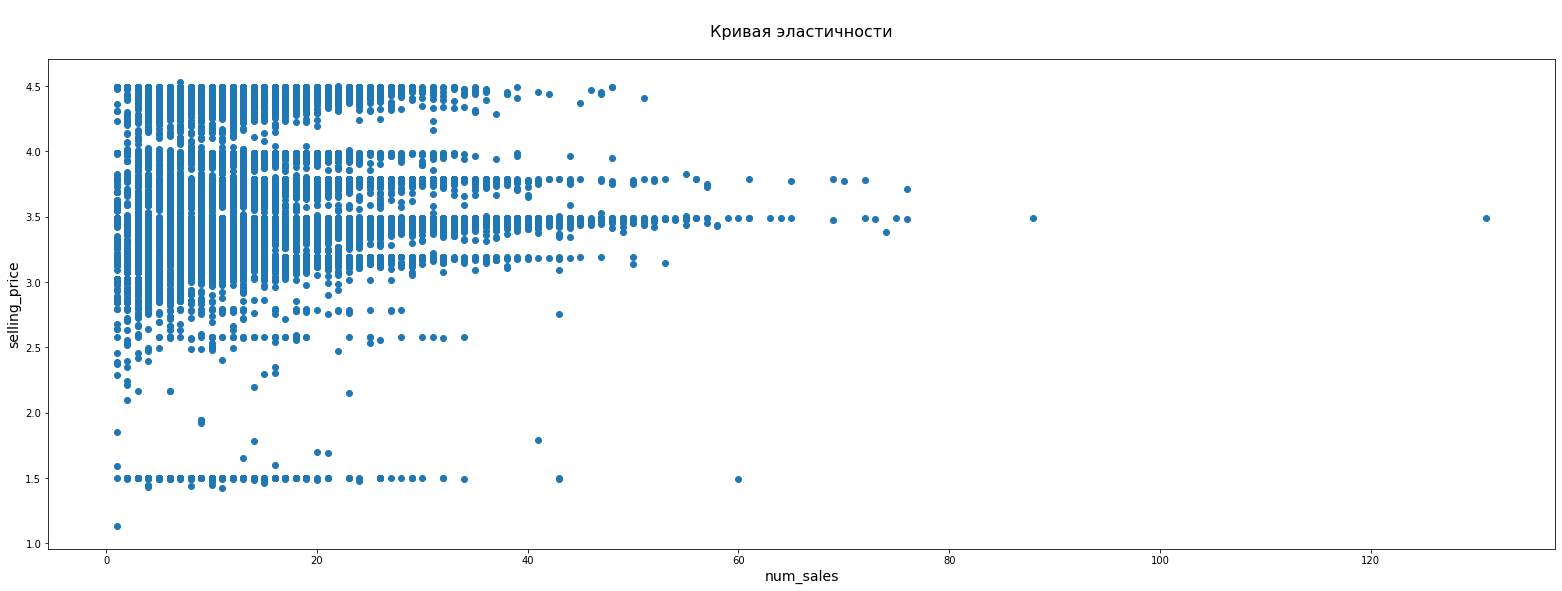

In [158]:
x = df[df.sku=='b75147feae4cf8ec07fb5f2cef855def'].num_sales
y = df[df.sku=='b75147feae4cf8ec07fb5f2cef855def'].selling_price_sku

plt.figure(figsize=(27, 9))
plt.title('\nКривая эластичности\n', fontdict={'fontsize': 16})
plt.xlabel('num_sales', fontdict={'fontsize': 14})
plt.ylabel('selling_price', fontdict={'fontsize': 14})
plt.scatter(x, y)
plt.show()

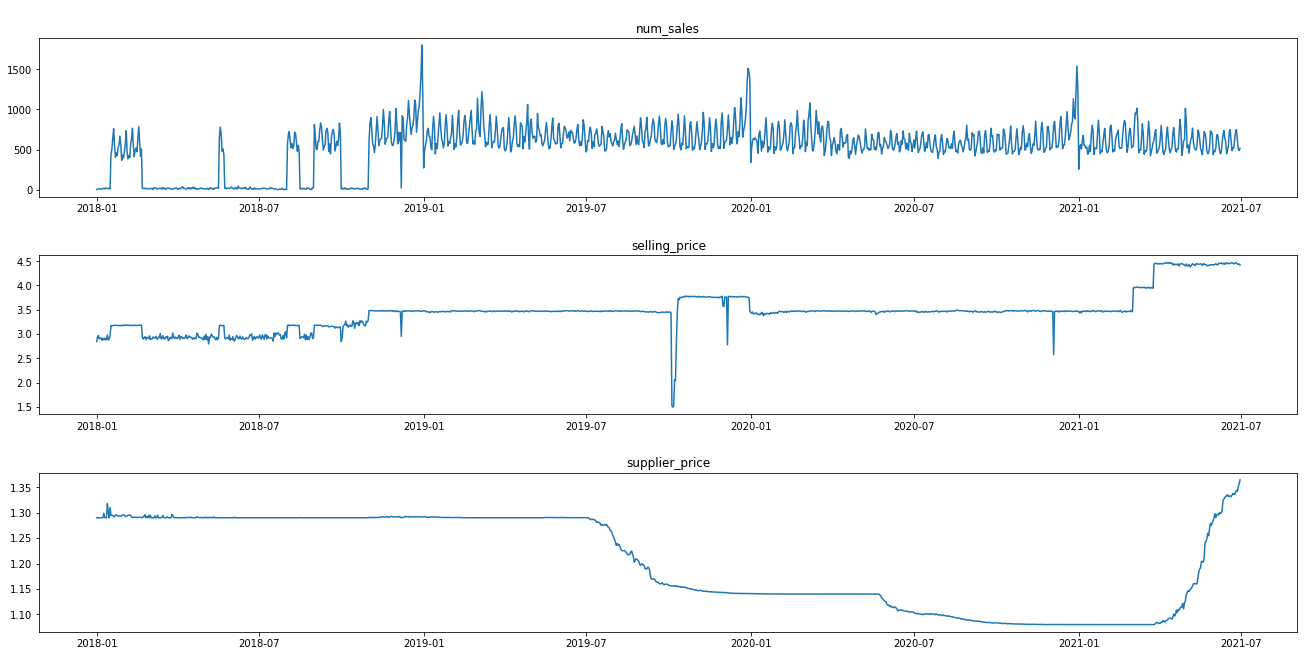

In [159]:
fig, axs = plt.subplots(3, 1, figsize=(18, 9), constrained_layout=True)

df_b751 = df[df.sku=='b75147feae4cf8ec07fb5f2cef855def'][['date', 'num_sales', 'supplier_price', 'selling_price']].groupby(by=['date']).sum().reset_index()

x = df_b751.date
y1 = df_b751.num_sales

df_b751['selling_price_sku'] = df_b751['selling_price']/df_b751['num_sales']
y2 = df_b751.selling_price_sku

df_b751['supplier_price_sku'] = df_b751['supplier_price']/df_b751['num_sales']
y3 = df_b751.supplier_price_sku

axs[0].set_title('\nnum_sales')
axs[0].plot(x, y1)

axs[1].set_title('\nselling_price')
axs[1].plot(x, y2)

axs[2].set_title('\nsupplier_price')
axs[2].plot(x, y3)

plt.show()

### По пакетам видим, что эластичность нулевая

In [160]:
df[df.sku=='ab17bf24039893348f6b9f23753f38ca']

,day,shop_id,sku,num_sales,supplier_price,selling_price,supplier_price_sku,selling_price_sku,date
85,20180101,07aeb18febbdbf77511a10fd4aa49942,ab17bf24039893348f6b9f23753f38ca,1.62,9.79,9.71,6.04,5.99,2018-01-01
141,20180101,087c8abfaee44ebbf0c2871976a2ab18,ab17bf24039893348f6b9f23753f38ca,1.72,10.40,8.16,6.05,4.74,2018-01-01
661,20180101,898dc2c947cee718e4afd7dfcb2f1a09,ab17bf24039893348f6b9f23753f38ca,2.14,12.96,12.85,6.04,5.99,2018-01-01
699,20180101,8c5781246fcb0296e1f11cd4e2eee68d,ab17bf24039893348f6b9f23753f38ca,7.39,44.66,44.29,6.04,5.99,2018-01-01
2705,20180102,6a2095bc178dbb0ba00e8fd5f10306b2,ab17bf24039893348f6b9f23753f38ca,3.70,22.39,22.21,6.04,6.00,2018-01-02
...,...,...,...,...,...,...,...,...,...
17971617,20210627,785ee201dc63daae3aecb2c7cbae60d3,ab17bf24039893348f6b9f23753f38ca,2.08,39.05,31.15,18.74,14.95,2021-06-27
17974341,20210627,ab1048060528a978a536ee2e9538de28,ab17bf24039893348f6b9f23753f38ca,1.02,15.48,14.78,15.18,14.49,2021-06-27
17984825,20210628,785ee201dc63daae3aecb2c7cbae60d3,ab17bf24039893348f6b9f23753f38ca,7.25,135.80,108.32,18.74,14.94,2021-06-28
17987904,20210628,bda8f8645db921d24845639f76635574,ab17bf24039893348f6b9f23753f38ca,3.23,52.20,42.89,16.15,13.27,2021-06-28


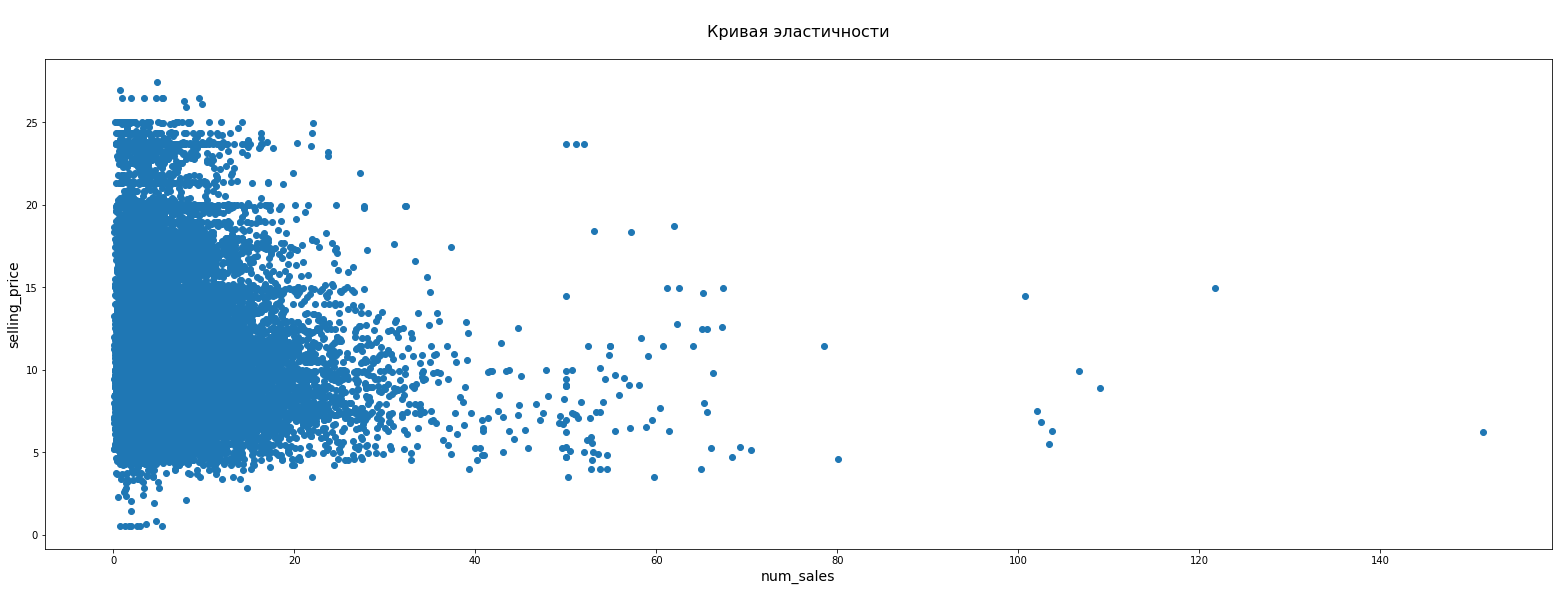

In [161]:
x = df[df.sku=='ab17bf24039893348f6b9f23753f38ca'].num_sales
y = df[df.sku=='ab17bf24039893348f6b9f23753f38ca'].selling_price_sku

plt.figure(figsize=(27, 9))
plt.title('\nКривая эластичности\n', fontdict={'fontsize': 16})
plt.xlabel('num_sales', fontdict={'fontsize': 14})
plt.ylabel('selling_price', fontdict={'fontsize': 14})
plt.scatter(x, y)
plt.show()

In [163]:
# Похоже на лук, эластичность практически не прослеживается

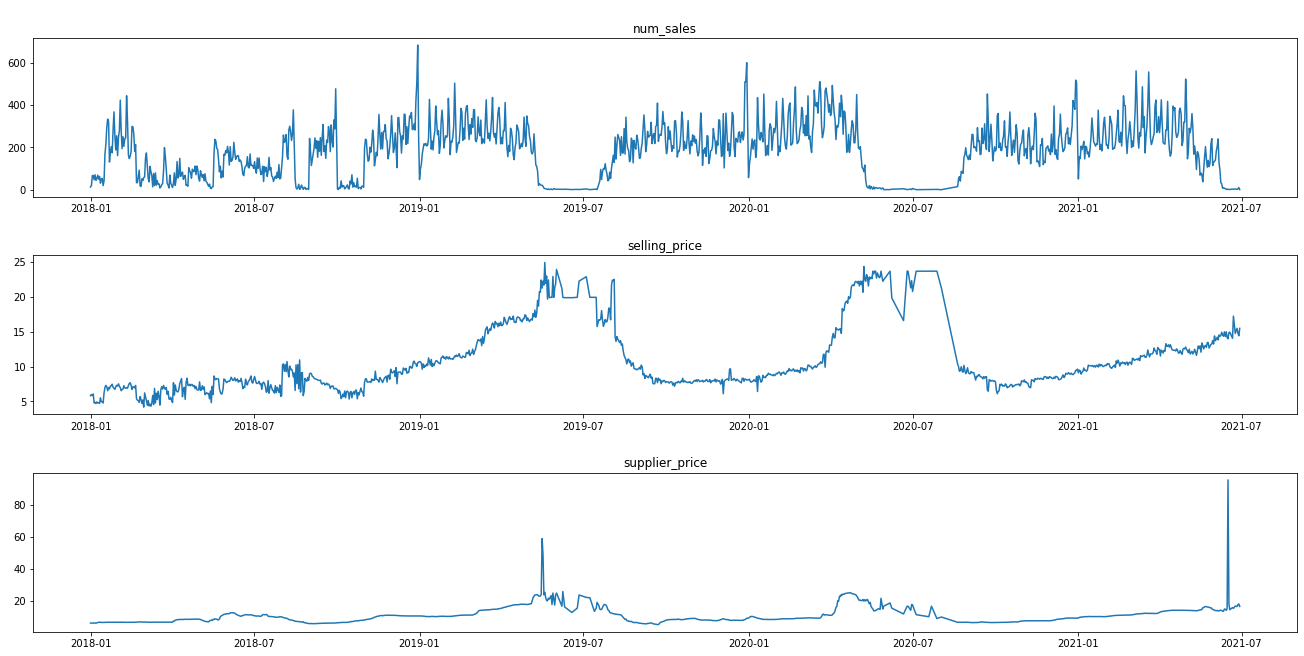

In [162]:
fig, axs = plt.subplots(3, 1, figsize=(18, 9), constrained_layout=True)

df_ab17 = df[df.sku=='ab17bf24039893348f6b9f23753f38ca'][['date', 'num_sales', 'supplier_price', 'selling_price']].groupby(by=['date']).sum().reset_index()

x = df_ab17.date
y1 = df_ab17.num_sales

df_ab17['selling_price_sku'] = df_ab17['selling_price']/df_ab17['num_sales']
y2 = df_ab17.selling_price_sku

df_ab17['supplier_price_sku'] = df_ab17['supplier_price']/df_ab17['num_sales']
y3 = df_ab17.supplier_price_sku

axs[0].set_title('\nnum_sales')
axs[0].plot(x, y1)

axs[1].set_title('\nselling_price')
axs[1].plot(x, y2)

axs[2].set_title('\nsupplier_price')
axs[2].plot(x, y3)

plt.show()

In [104]:
df_checks_train[(df_checks_train['sku']=='b75147feae4cf8ec07fb5f2cef855def')&(df_checks_train['shop_id']=='4bc8f1a601aee89546deeb66b9625008')]

In [ ]:
&(df_checks_train['sku']=='b75147feae4cf8ec07fb5f2cef855def')&(df_checks_train['shop_id']=='4bc8f1a601aee89546deeb66b9625008')

In [71]:
df_checks_train['date'] = pd.to_datetime(df_checks_train['day'].astype(str), format='%Y%m%d')

In [72]:
df_checks_train

In [ ]:
df.

In [103]:
df_checks_train[(df_checks_train.sku=='b75147feae4cf8ec07fb5f2cef855def')&(df_checks_train.num_sales>2)&(df_checks_train.selling_price<10)]

,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,num_sales,supplier_price,selling_price,discount,region_name,supplier_sum,selling_sum,date
27720,b9a70651ba49cac54697bcd3d2802eb9,20201006,6cb9669ff7bbb140212081ccb0f68543,056acee503ca054be0af97875b548582,22:03:38,b75147feae4cf8ec07fb5f2cef855def,35b6dd57a447d21096561f5c233ca5b4,1,3.00,3.25,9.39,1.68,7e35e74e610188414ad24235dd787c78,9.75,28.17,2020-10-06
62365,90bbdc680518471176bfb725df122a2b,20190707,f865c5e07958ad70ef989e905390f6d0,f7be7e2b7418fd4385cd46c7ab2ef534,22:51:57,b75147feae4cf8ec07fb5f2cef855def,f80efdede09713c2384f0a8bc01b5432,1,3.00,3.87,9.39,1.68,7e35e74e610188414ad24235dd787c78,11.61,28.17,2019-07-07
97962,f540bcbddfbb5e1ea7d3a789287ec214,20200109,7dd5071ff43138f6756e30f4b271c4ac,dd4957756736661134cd3135b5d804f3,19:33:57,b75147feae4cf8ec07fb5f2cef855def,d9ca24d75e5cecc5a01c452cc8b8288e,1,3.00,3.46,8.85,2.22,7e35e74e610188414ad24235dd787c78,10.38,26.55,2020-01-09
106699,b258e3c731c1f0602ea9a802f0995141,20180522,0e0b24fc303d2b384be5a2464654a5d2,a2568ebf7bae5fc9cc92dc9d119cd3cc,13:00:38,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,1,3.00,3.87,9.57,0.51,7e35e74e610188414ad24235dd787c78,11.61,28.71,2018-05-22
107764,d782c11a57b6f6734cc87134241a8e21,20180522,c88a45cebe37ef31231604ff583105be,6d40763c4cc1c3d768581939397bc288,19:14:43,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,17,3.00,3.87,9.57,0.51,7e35e74e610188414ad24235dd787c78,11.61,28.71,2018-05-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21552666,8261d429445ba0f1a9a03973ae33efa4,20190209,e90b327c1ceca11f1a44a8bcf58af34c,26a7557a06a5f68f7b66f514b1f5473e,18:49:22,b75147feae4cf8ec07fb5f2cef855def,7824645736b07af56f150245dc52051e,27,3.00,3.87,9.39,1.68,7e35e74e610188414ad24235dd787c78,11.61,28.17,2019-02-09
21583272,6c5cad0b011f24d1608ab163f135f19e,20201004,155d328d7db586cf215aca5e8088dfed,6cb8f70bc158250d4ff1e5d4238ac412,13:55:58,b75147feae4cf8ec07fb5f2cef855def,35b6dd57a447d21096561f5c233ca5b4,1,3.00,3.26,9.39,1.68,7e35e74e610188414ad24235dd787c78,9.78,28.17,2020-10-04
21584975,729517c0a3b771f4bfe09f6def230b9f,20201004,785ee201dc63daae3aecb2c7cbae60d3,afc58cd50dbdcefb658c81e3215c36ba,16:34:03,b75147feae4cf8ec07fb5f2cef855def,85c3fc1ae85ea4526f648fbff2f50f60,1,3.00,3.24,9.81,1.26,7e35e74e610188414ad24235dd787c78,9.72,29.43,2020-10-04
21628368,b600f32368d918388921581ee9a7500d,20201228,c22b7285b63e1d6f09a10dc258858d48,8acbeccf1fb74cdbd05259cf01ca6ba8,10:21:50,b75147feae4cf8ec07fb5f2cef855def,47b5739208ae99fe23f06fedb3ee8ea7,1,3.00,3.24,9.96,1.11,7e35e74e610188414ad24235dd787c78,9.72,29.88,2020-12-28


In [ ]:
(df_checks_train.selling_price>200)|